In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout
import keras.optimizers
import tensorflow as tf
import keras.optimizers
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout

In [2]:
#Load dataset
df=shuffle(pd.read_csv('/content/cleaned_539.csv'))
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.rename(columns={'0': 'text'},inplace=True)
df=df.reset_index(drop=True)
df.head()

,text,dialect
0,مادخلك دولة الرئيس خلي الحكيم ينفعكم بعتو السن...,LB
1,يا استاذ يزبك الناس صارت واعيه ماحدا يقدر يضحك...,LB
2,هيدي بينطبق المثل صيت كبير ومزرعه خربانه العمى,LB
3,لايك شكر مش لازم نخلي علينا نظرة مش مليحة,DZ
4,البنت تجيب العيداذا تحمست بالدعاء يارب تكفى ال...,SA


In [3]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [9]:
#Train
X = df["text"]
y = df["dialect"]
# converting categorical variables to numerical
le = LabelEncoder()
y = le.fit_transform(y)
# creating bag of words using countvectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(X)).toarray()
#train test splitting
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42,stratify=y)
#model creation and prediction
model = MultinomialNB()
model.fit(x_train, y_train)
# prediction 
y_pred = model.predict(x_test)
# model evaluation
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Accuary is: ',ac)
target_names =list(df["dialect"].unique())

Accuary is:  0.48300720906282185


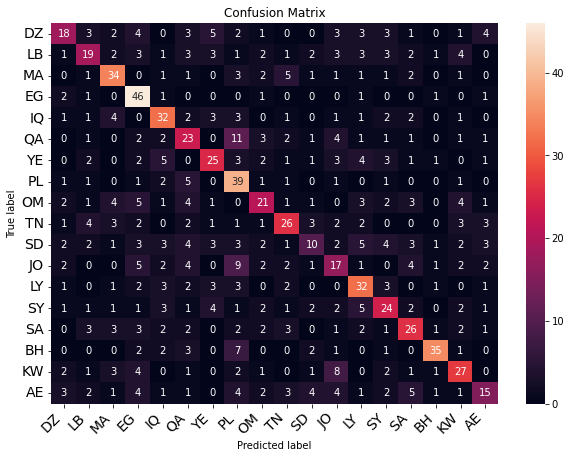

In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred)
_ = print_confusion_matrix(cnf_matrix, target_names)

In [11]:
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

          DZ       0.49      0.34      0.40        53
          LB       0.44      0.35      0.39        54
          MA       0.58      0.63      0.60        54
          EG       0.52      0.85      0.64        54
          IQ       0.52      0.59      0.56        54
          QA       0.38      0.43      0.40        54
          YE       0.52      0.46      0.49        54
          PL       0.41      0.72      0.53        54
          OM       0.47      0.39      0.42        54
          TN       0.52      0.48      0.50        54
          SD       0.34      0.19      0.24        54
          JO       0.32      0.31      0.32        54
          LY       0.49      0.59      0.54        54
          SY       0.45      0.44      0.45        54
          SA       0.49      0.48      0.49        54
          BH       0.80      0.65      0.71        54
          KW       0.51      0.50      0.50        54
          AE       0.44    

In [12]:
#Train Multinominal naive bayes on all data
model.fit(X,y)

MultinomialNB()

In [13]:
# saving both vectorizer and model
pickle.dump(vectorizer, open("transform.pkl", "wb"))
pickle.dump(model, open("nb_model.pkl", "wb"))

In [14]:
#Try logistic regression
X = df["text"]
y = df["dialect"]
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(list(X)).toarray()
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,stratify=y)
#model creation and prediction
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_2.fit(x_train, y_train)
# prediction 
y_pred = model_2.predict(x_test)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Accuary is: ',ac)
target_names =list(df["dialect"].unique())

Accuary is:  0.42636457260556127


In [15]:
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

          DZ       0.33      0.28      0.30        54
          LB       0.31      0.24      0.27        54
          MA       0.48      0.50      0.49        54
          EG       0.58      0.63      0.60        54
          IQ       0.56      0.65      0.60        54
          QA       0.37      0.28      0.32        54
          YE       0.41      0.39      0.40        54
          PL       0.52      0.65      0.58        54
          OM       0.46      0.35      0.40        54
          TN       0.51      0.56      0.53        54
          SD       0.18      0.31      0.23        54
          JO       0.32      0.35      0.33        54
          LY       0.47      0.61      0.53        54
          SY       0.36      0.38      0.37        53
          SA       0.44      0.48      0.46        54
          BH       0.79      0.43      0.55        54
          KW       0.47      0.41      0.44        54
          AE       0.29    

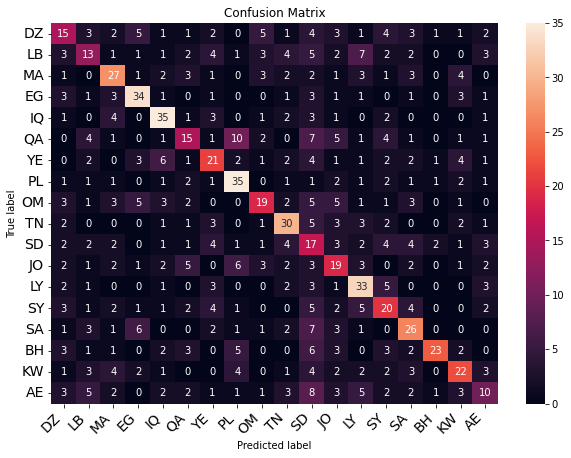

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)
_ = print_confusion_matrix(cnf_matrix, target_names)

Trainig deep learning model

In [4]:
#Train
X = df["text"]
y = df["dialect"]
# prepare tokenizer
vocab_sz=41510
t = Tokenizer(num_words=vocab_sz,oov_token='UNK')
t.fit_on_texts(X)
# Extract binary BoW features
X = t.texts_to_matrix(X, mode='tfidf')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np_utils.to_categorical(y)

In [5]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.5,stratify=y,random_state=42)

In [6]:
model = Sequential()
# Note: glorot_uniform is the Xavier uniform initializer.

model.add(Dense(500,input_shape=(41510,), kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(300, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(100, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(18, kernel_initializer="glorot_uniform", activation="softmax"))
model_optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=model_optimizer,
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               20755500  
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 18)                1

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    batch_size=512,
                    validation_split=0.4,
                    shuffle=True,
                    verbose=2)

Epoch 1/25
6/6 - 4s - loss: 3.2663 - accuracy: 0.0488 - val_loss: 2.9089 - val_accuracy: 0.0757 - 4s/epoch - 687ms/step
Epoch 2/25
6/6 - 1s - loss: 3.0257 - accuracy: 0.0584 - val_loss: 2.9041 - val_accuracy: 0.0886 - 638ms/epoch - 106ms/step
Epoch 3/25
6/6 - 1s - loss: 2.9744 - accuracy: 0.0581 - val_loss: 2.8961 - val_accuracy: 0.0582 - 655ms/epoch - 109ms/step
Epoch 4/25
6/6 - 1s - loss: 2.9248 - accuracy: 0.0639 - val_loss: 2.8914 - val_accuracy: 0.0613 - 641ms/epoch - 107ms/step
Epoch 5/25
6/6 - 1s - loss: 2.9046 - accuracy: 0.0753 - val_loss: 2.8906 - val_accuracy: 0.0536 - 752ms/epoch - 125ms/step
Epoch 6/25
6/6 - 1s - loss: 2.8963 - accuracy: 0.0629 - val_loss: 2.8889 - val_accuracy: 0.0969 - 740ms/epoch - 123ms/step
Epoch 7/25
6/6 - 1s - loss: 2.8848 - accuracy: 0.0680 - val_loss: 2.8873 - val_accuracy: 0.0871 - 671ms/epoch - 112ms/step
Epoch 8/25
6/6 - 1s - loss: 2.8756 - accuracy: 0.0708 - val_loss: 2.8856 - val_accuracy: 0.1180 - 632ms/epoch - 105ms/step
Epoch 9/25
6/6 - 1s

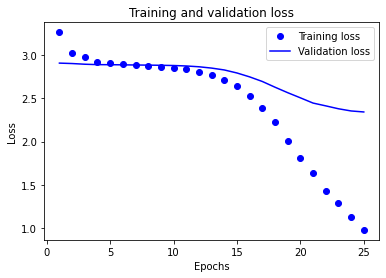

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

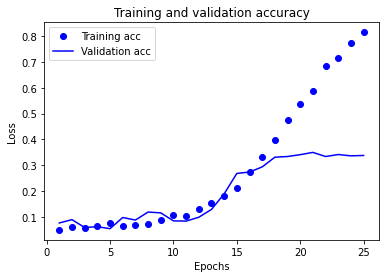

In [9]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# Evaluation on Test set
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

152/152 [==============================] - 2s 10ms/step - loss: 2.3744 - accuracy: 0.3290
accuracy: 32.90%


In [11]:
target_names =list(df["dialect"].unique())
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred,axis=1)
y_pred = np_utils.to_categorical(y_pred, num_classes=len(target_names))

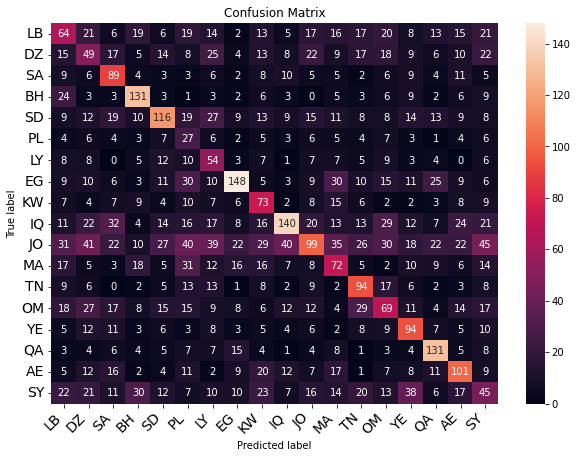

In [12]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_pred,axis=1), np.argmax(y_test,axis=1))
_ = print_confusion_matrix(cnf_matrix,target_names)

In [13]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          LB       0.22      0.24      0.23       270
          DZ       0.18      0.18      0.18       269
          SA       0.48      0.33      0.39       269
          BH       0.60      0.49      0.54       270
          SD       0.35      0.43      0.39       269
          PL       0.26      0.10      0.14       270
          LY       0.36      0.20      0.26       269
          EG       0.42      0.55      0.48       270
          KW       0.40      0.27      0.32       270
          IQ       0.33      0.52      0.41       269
          JO       0.17      0.37      0.23       270
          MA       0.28      0.27      0.27       270
          TN       0.47      0.35      0.40       269
          OM       0.23      0.26      0.24       270
          YE       0.47      0.35      0.40       269
          QA       0.60      0.49      0.53       270
          AE       0.40      0.38      0.39       269
          SY       0.14    

In [14]:
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
# Saving Model
model.save('dl_model.h5')